**Column Description**

1. **RowNumber** - Sequential index of the customer in the dataset.  
2. **CustomerId** - Unique identifier assigned to each customer.  
3. **Surname** - Last name of the customer.  
4. **CreditScore** - Credit rating of the customer (higher is better).  
5. **Geography** - Country of residence of the customer.  
6. **Gender** - Gender of the customer (Male/Female).  
7. **Age** - Age of the customer in years.  
8. **Tenure** - Number of years the customer has been with the bank.  
9. **Balance** - Account balance of the customer.  
10. **NumOfProducts** - Number of financial products the customer has.  
11. **HasCrCard** - Indicates whether the customer has a credit card (1 = Yes, 0 = No).  
12. **IsActiveMember** - Indicates if the customer is an active member (1 = Yes, 0 = No).  
13. **EstimatedSalary** - Estimated yearly salary of the customer.  
14. **Exited** - Indicates whether the customer has churned (1 = Yes, 0 = No).  
15. **Complain** - Whether the customer has filed a complaint (1 = Yes, 0 = No).  
16. **Satisfaction Score** - Customer satisfaction rating on a scale.  
17. **Card Type** - Type of credit card the customer holds (e.g., Gold, Diamond).  
18. **Point Earned** - Reward points accumulated by the customer.  


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("/content/Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.shape

(10000, 18)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
# Let's remove some of the apparant unnecessary columns
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [9]:
# Let's check the class imbalance
df['Exited'].value_counts()

,count
Exited,
0,7962
1,2038


We can notice a huge class imbalance, we'll work on it if it doesn't work well with the given data.

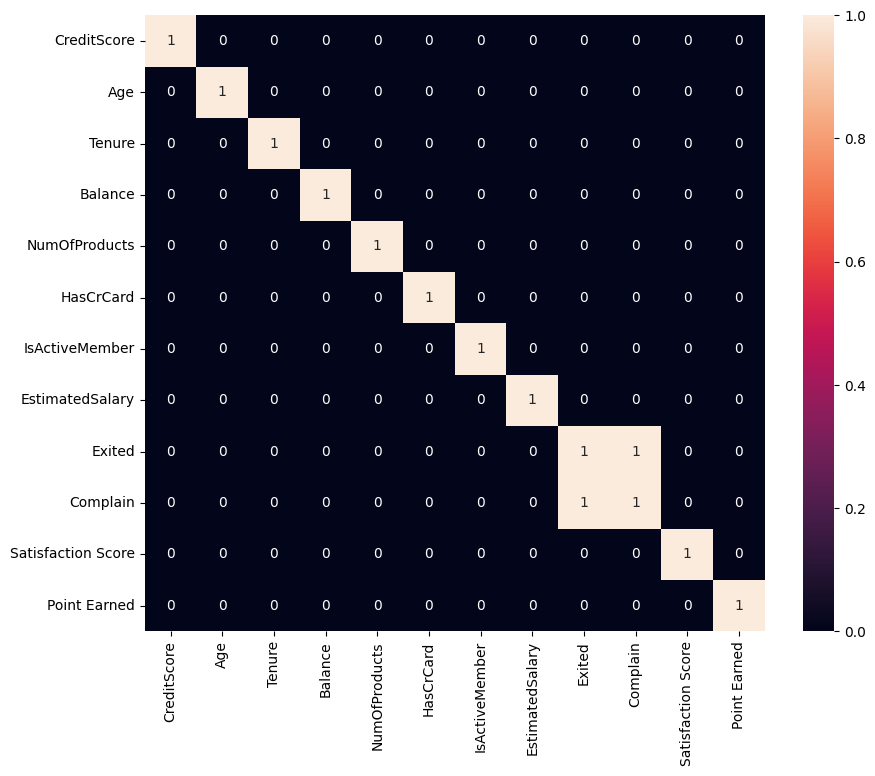

In [10]:
# :et's check correlation of all the numerical columns
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(numeric_only=True)>0.8, annot=True, cbar = True)
plt.show()

Apparanly complained and Exited are highly correlated meaning the peroson who raise a complaint is likely to churn in the future.

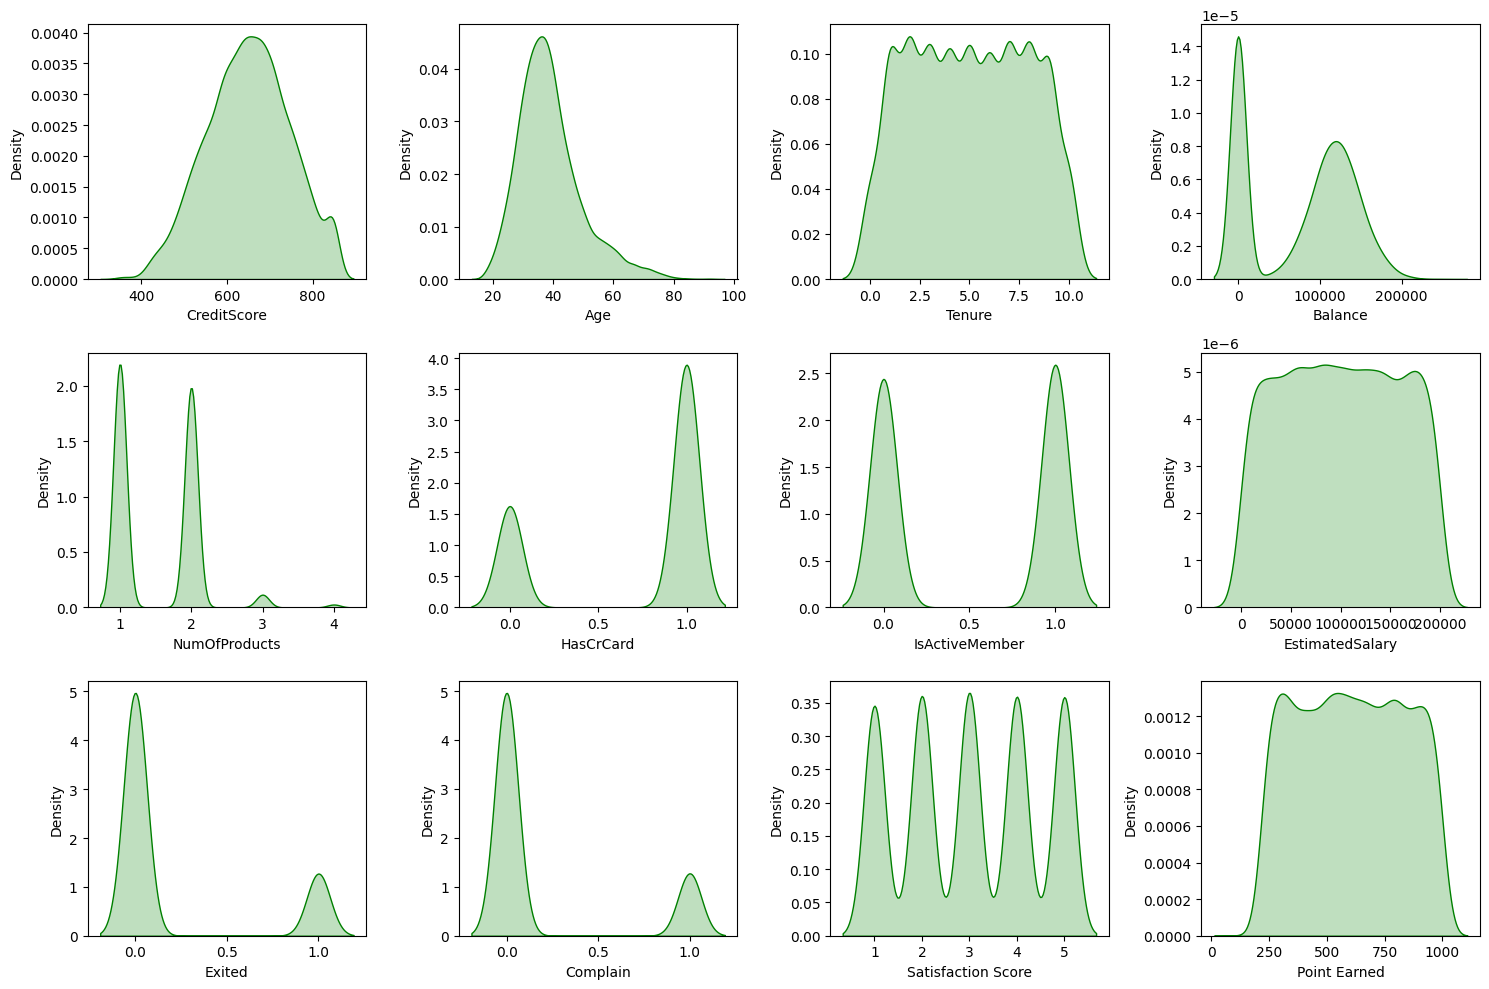

In [11]:
i = 0
plt.figure(figsize = (15, 10))
for col in df.columns:
    if df[col].dtypes != object:
        i = i + 1
        plt.subplot(3, 4, i)
        sns.kdeplot(df[col], fill=True, color = 'g')
        plt.tight_layout()
plt.show()

We can understand the distribution of data points to a certain extent from this.

In [12]:
# Let's separate categorical and numerical columns
col = (df.dtypes == object)
obj_cols = (col[col] == True).index
col = (df.dtypes != object)
num_cols = (col[col] == True).index
obj_cols, num_cols

(Index(['Geography', 'Gender', 'Card Type'], dtype='object'),
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
        'Satisfaction Score', 'Point Earned'],
       dtype='object'))

In [13]:
# Let's check the unique values of all the categorical columns
for col in obj_cols:
    print(df[col].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


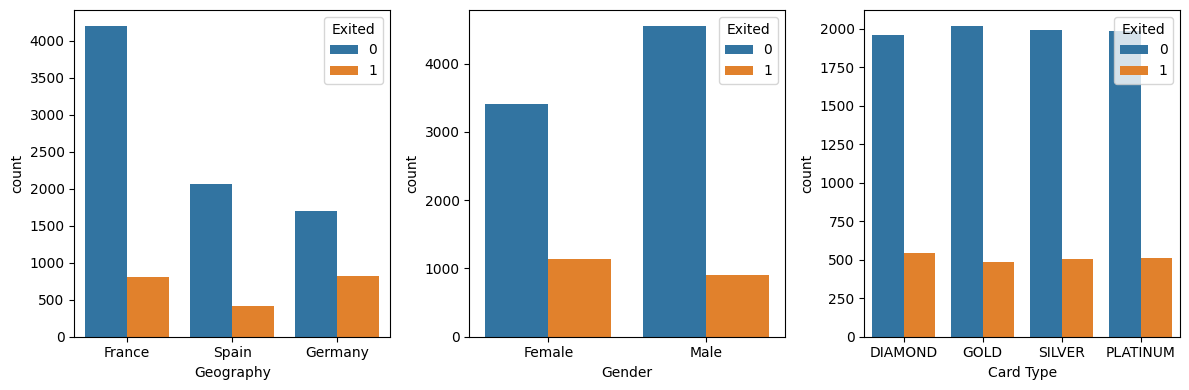

In [14]:
# Let's draw a count plot of all the categorical columns
plt.figure(figsize=(12, 4))
index=0
for col in obj_cols:
    index += 1
    plt.subplot(1, 3, index)
    sns.countplot(x=df[col], hue = df['Exited'])
    plt.tight_layout()
plt.show()

from the above figures we can observe that,
* Fance and Germany has the most churn rate
* Most of the churners are Female
* Also DIMOND card holders has the most number of churners

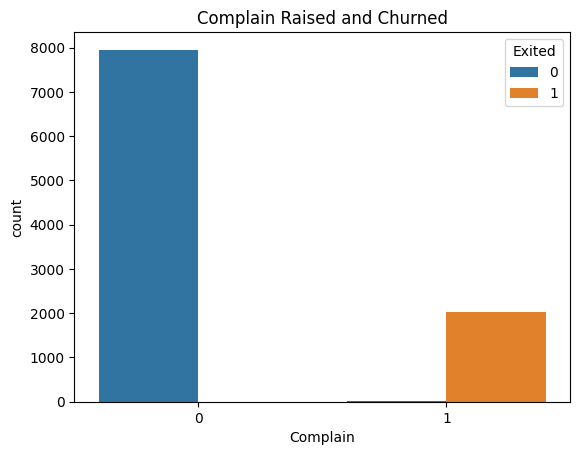

In [15]:
# Let's check how many person churned after raising a complaint
sns.countplot(x=df['Complain'], hue = df["Exited"])
plt.title("Complain Raised and Churned")
plt.show()

This gives a very important information that almost all the customers who rised complaints have churned showing that their complaints are not handled properly.
This reveals that there is very poor customer satisfaction within the bank.

In [16]:
df.groupby('Complain')['Exited'].value_counts()

Complain  Exited
0         0         7952
          1            4
1         1         2034
          0           10
Name: count, dtype: int64

We can confirm the above thing here as well.

Text(0.5, 1.0, 'Churn rate based on Tenure')

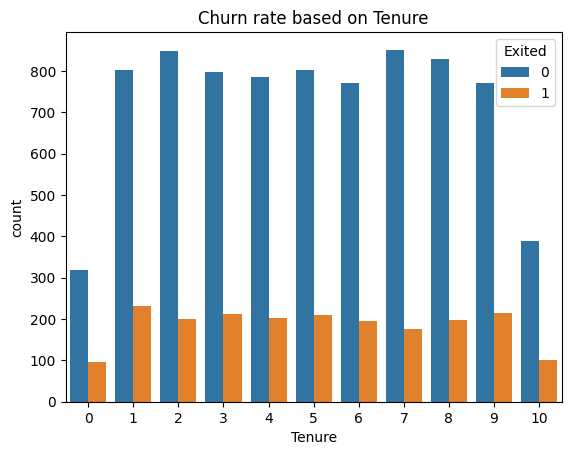

In [17]:
sns.countplot(x=df["Tenure"], hue=df['Exited'])
plt.title("Churn rate based on Tenure")

* We can observe the highest churn is hapenning for the customers who are with the bank for 1, 3 and 9 years.
* Although we see a significant numbers of churns even in all the other years as well.

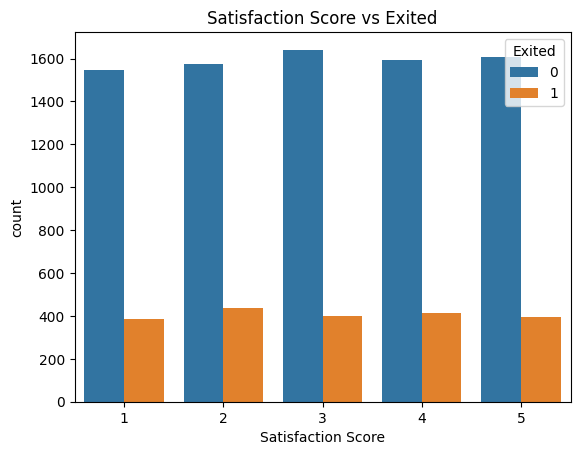

In [18]:
# sns.barplot(df.groupby('Satisfaction Score')['Exited'].value_counts())
sns.countplot(x=df['Satisfaction Score'], hue=df['Exited'])
plt.title("Satisfaction Score vs Exited")
plt.show()

We can see almost an equal number of churned people across all the satisfaction score however 2 has the most amount of churners.

In [19]:
# # Encoding Categorical Columns
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for col in obj_cols:
#     df[col] = le.fit_transform(df[col])

In [20]:
# Feature selection
x = df.drop('Exited', axis=1)
y = df['Exited']

# Separating training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 14), (2000, 14), (8000,), (2000,))

In [21]:
# Let's standardize the training data using Standard Scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(x_test_scaled)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
print("Accuracy Score of this model is : ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy Score of this model is :  0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



We can see that the model is performing exellently, we can say the the model is an excellent model

In [26]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear')
svc.fit(x_train_scaled, y_train)

print("Accuracy Score of this model is : ", accuracy_score(svc.predict(x_test_scaled), y_test))
print(classification_report(svc.predict(x_test_scaled), y_test))

Accuracy Score of this model is :  0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



SVC is performing even better than Decision Tree Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)

print("Accuracy Score of this model is : ", accuracy_score(rfc.predict(x_test_scaled), y_test))
print(classification_report(rfc.predict(x_test_scaled), y_test))

Accuracy Score of this model is :  0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Apparantly all the basic models are performing really well for this problem, so in this example we'll go ahead with the SVC model for deployent.

In [29]:
# Code to save the model using joblib
import joblib

joblib.dump(svc, "BCA_model.pkl")

['BCA_model.pkl']

In [30]:
# Creating multi label encoder classs for managing multiple label encoders.
from sklearn.preprocessing import LabelEncoder

class MultiLabelEncoder:
    def __init__(self):
        self.encoders = {}     # for storing multiple label encoders in dict

    def fit(self, df):
        for col in df.columns:
            le = LabelEncoder()
            le.fit(df[col].astype(str))      #convert to string to prevent errors
            self.encoders[col] = le          #store the encoder

    def transform(self, col_names, values):
        if len(col_names) != len(values):
            raise ValueError("Number of columns names must match number of values")
        encoded_values = []

        for col, value in zip(col_names, values):
            if col in self.encoders:
                encoded_values.append(self.encoders[col].transform([value])[0])
            else:
                raise ValueError(f"No encoder found for column: {col}")
        return encoded_values

    def save(self, filename):
        joblib.dump(MultiLabelEncoder, "MLabelEncoder.pkl")


In [31]:
MLE = MultiLabelEncoder()
MLE.fit(df[obj_cols])

In [38]:
# Example useage
print(MLE.transform(['Geography','Gender',"Card Type"],['France','Female','DIAMOND']))

[0, 0, 0]


In [ ]:
MLE.save("MultiLabelEncoder.pkl")

In [42]:
df[obj_cols].apply(lambda x : )

TypeError: MultiLabelEncoder.transform() missing 1 required positional argument: 'values'

Thank you for going through this work till the end, feel free to get in touch if you ahve any questions... :)